In [1]:
%load_ext nb_mypy
%nb_mypy On

Version 1.0.5


In [2]:
from __future__ import annotations
import numpy as np
import random
import copy

from typing import Tuple, List
from numpy import array, zeros

# from Big_Class import Big_Class  # already imported one NETfuncs is imported
from User_Variables import User_Variables  # already imported one NETfuncs is imported
from Network_Structure import Network_Structure  # already imported one NETfuncs is imported
from Big_Class import Big_Class
from Network_State import Network_State
from Networkx_Net import Networkx_Net
import NETfuncs, matrix_functions, functions, statistics, plot_functions, solve

In [3]:
## Parameters

Nin: int = 2
Ninter: int = 0
Nout: int = 3

# learning rate
# alpha_vec = np.array([0.2, 0.5, 1.0, 2.0, 2.5, 2.7, 3.5, 4.0, 8.0])  # 1D array = const alpha, array of arrays = annealed
# alpha_vec = np.array([np.append(np.linspace(4.1,4.8,200), np.linspace(4.8,4.1,200))])  # 1D array for constant alpha, array of arrays for annealed alpha
# alpha_vec: np.ndarray = np.array([0.2])  # for allostery, regression and general_reg
# alpha_vec = np.array([0.1])  # for general_reg_allRsChange
# alpha_vec = np.array([np.linspace(5,3.85,40)])  # 1D array for constant alpha, array of arrays for annealed alpha
# alpha_vec = np.array([4.8])
alpha: float = 0.2  # for network combine attempt

# resistance-pressure proportionality factor
gamma: np.ndarray = np.array([1.0])

# R_update: str = 'propto'
R_update = 'deltaR'

# training length
iterations = 460  # number of sampled of p
    
supress_prints: bool = False
bc_noise: float = 0.0
use_p_tag: bool = True
    
M_values: np.ndarray = array([0.4, 0.25, 0.1, 0.15, 0.02, 0.3, 0.35, 0.15])
    
## Networkx sizes
scale: float = 5.0
squish: float = 0.01

In [4]:
## Assign input and output nodes a.f.o lattice size and row choice
input_nodes_arr, inter_nodes_arr, output_nodes_arr, ground_nodes_arr = matrix_functions.build_input_output_and_ground(Nin, Ninter, Nout)

<cell>2: error: Need more than 3 values to unpack (4 expected)  [misc]


In [5]:
print('input_nodes_arr ', input_nodes_arr)
print('inter_nodes_arr ', inter_nodes_arr)
print('output_nodes_arr ', output_nodes_arr)
print('ground_nodes_arr ', ground_nodes_arr)

input_nodes_arr  [0 1]
inter_nodes_arr  []
output_nodes_arr  [2 3 4]
ground_nodes_arr  [5]


In [6]:
## Variables class - mostly user choices
Variabs = User_Variables(iterations,\
                         Nin, \
                         Nout, \
                         gamma, \
                         R_update, \
                         use_p_tag, \
                         supress_prints, \
                         bc_noise, \
                         Ninter)
Variabs.assign_alpha_vec(alpha)
print('alpha_vec', Variabs.alpha_vec)
Variabs.create_M(M_values)

alpha_vec [0.2 0.2 0.2]


In [7]:
## Big Class containing all classes in Network Simulation
BigClass = Big_Class(Variabs)

In [8]:
## Structure class - build incidence matrices and 1d arrays of edges

Strctr = Network_Structure(input_nodes_arr, \
                           output_nodes_arr, \
                           inter_nodes_arr, \
                           ground_nodes_arr,)
Strctr.build_incidence()
Strctr.build_edges()
BigClass.add_Strctr(Strctr)  # add to big class

In [9]:
## Initiate internal flow network state class

State = Network_State(Nin, Nout)
State.initiate_resistances(BigClass)
BigClass.add_State(State)  # add to big class

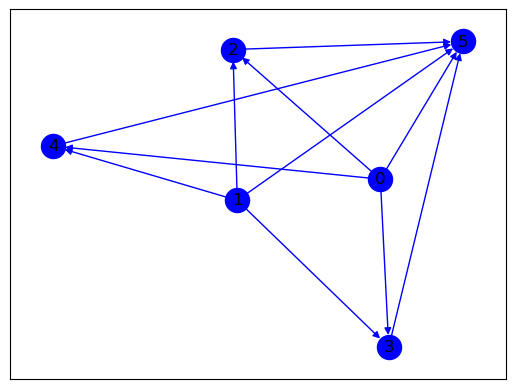

NET is ready


In [10]:
## build network graphics class and plot structure

NET = Networkx_Net(scale, squish)
NET.buildNetwork(BigClass)
NET.build_pos_lattice(BigClass, plot=True, node_labels=True)
BigClass.add_NET(NET)  # add to big class

## Start loop from here

In [11]:
for i in range(Variabs.iterations):
    print('i', i)
    State.draw_p_in_and_desired(Variabs)
    print('p_drawn ', State.input_drawn)
    print('desired output', State.desired)
    State.solve_flow_given_problem(BigClass, "measure")  # measure and don't change resistances
    print('output meausred', State.output)
    if not i % 2:  # even iterations, take another sampled pressure and measure again
        pass
    else:  # odd iterations, go to dual problem and update resistances
        State.calc_loss(BigClass)
        State.update_pressure_dual(BigClass)
        State.update_output_dual(BigClass)
        State.solve_flow_given_problem(BigClass, "dual")  # measure and don't change resistances
        State.update_Rs(BigClass)

i 0
p_drawn  [1.98144896 1.63144798]
desired output [1.20044158 0.44286209 0.52906337]
Rs [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
output meausred [1.20429898 1.20429898 1.20429898]
i 1
p_drawn  [1.30314803 1.32751334]
desired output [0.85313755 0.3294418  0.42431696]
Rs [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
output meausred [0.87688712 0.87688712 0.87688712]
loss= [[-0.02374958 -0.54744532 -0.45257016]
 [-0.0038574  -0.76143689 -0.67523561]]
time= 1
input_dual_nxt= [0.0565384  0.02533385]
output_dual_nxt [ 0.00130259 -0.01401268 -0.01458066]
Rs [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
R_nxt [1.05523581 1.07055107 1.07111906 1.02403127 1.03934653 1.03991452
 1.0565384  1.02533385 1.00130259 0.98598732 0.98541934]
i 2
p_drawn  [1.61821745 0.97865404]
desired output [0.89195049 0.30861985 0.32596056]
Rs [1.05523581 1.07055107 1.07111906 1.02403127 1.03934653 1.03991452
 1.0565384  1.02533385 1.00130259 0.98598732 0.98541934]
output meausred [0.85162377 0.84288571 0.8425599 ]
i 3
p_drawn  [1.10772645 1.1

Rs [2.19460548 2.72763013 2.58046948 1.66201561 2.19504027 2.04787961
 2.32873607 1.79614621 1.1341306  0.60110594 0.7482666 ]
R_nxt [2.19117419 2.77682607 2.63225262 1.65796613 2.24361801 2.09904456
 2.3613693  1.82816124 1.17019511 0.58454323 0.72911668]
i 170
p_drawn  [0.33234945 1.1175349 ]
desired output [0.4123235  0.20086518 0.34190746]
Rs [2.19117419 2.77682607 2.63225262 1.65796613 2.24361801 2.09904456
 2.3613693  1.82816124 1.17019511 0.58454323 0.72911668]
output meausred [0.43138983 0.24548569 0.29565156]
i 171
p_drawn  [1.96018931 0.84383121]
desired output [0.99503353 0.32259361 0.29235315]
Rs [2.19117419 2.77682607 2.63225262 1.65796613 2.24361801 2.09904456
 2.3613693  1.82816124 1.17019511 0.58454323 0.72911668]
output meausred [0.73326987 0.4299555  0.5147104 ]
loss= [[ 0.26176365 -0.10736189 -0.22235725]
 [-0.01906632 -0.04462051  0.0462559 ]]
time= 86
input_dual_nxt= [ 0.01644917 -0.00276575]
output_dual_nxt [ 0.01695539 -0.00231478 -0.01176842]
Rs [2.19117419 2.77

Rs [2.24836793 2.96440568 2.77738693 1.6139054  2.32994315 2.1429244
 2.48985351 1.85539098 1.24148558 0.52544783 0.71246659]
R_nxt [2.24699853 2.96480038 2.77843473 1.61241387 2.33021572 2.14385007
 2.4900568  1.85547214 1.24305827 0.52525641 0.71162207]
i 318
p_drawn  [1.39806484 1.45001918]
desired output [0.92173073 0.35730936 0.46296705]
Rs [2.24699853 2.96480038 2.77843473 1.61241387 2.33021572 2.14385007
 2.4900568  1.85547214 1.24305827 0.52525641 0.71162207]
output meausred [0.81375725 0.40963034 0.52856405]
i 319
p_drawn  [0.21403283 0.30305106]
desired output [0.1613759  0.06686094 0.09519598]
Rs [2.24699853 2.96480038 2.77843473 1.61241387 2.33021572 2.14385007
 2.4900568  1.85547214 1.24305827 0.52525641 0.71162207]
output meausred [0.15146943 0.07573926 0.09786314]
loss= [[ 0.00990647 -0.00887832 -0.00266716]
 [ 0.10797348 -0.05232098 -0.065597  ]]
time= 160
input_dual_nxt= [0.00196679 0.00190523]
output_dual_nxt [ 0.01298972 -0.00290102 -0.00542079]
Rs [2.24699853 2.9648

<cell>1: error: Argument 3 to "plot_importants" has incompatible type "List[ndarray[Any, dtype[floating[Any]]]]"; expected "ndarray[Any, Any]"  [arg-type]


R theoretical 0.0


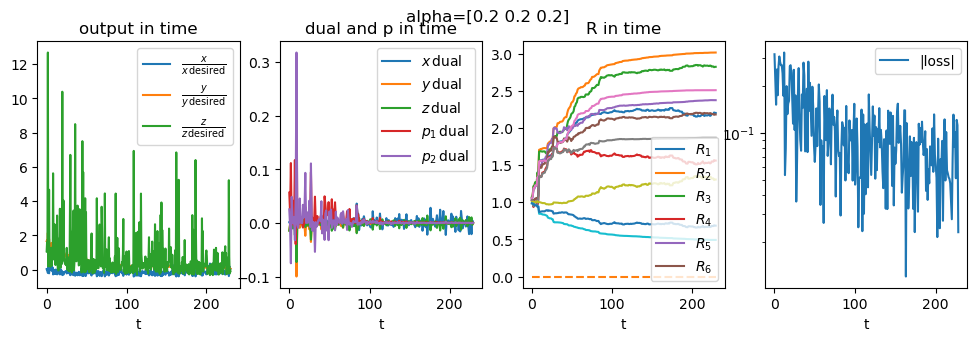

In [13]:
plot_functions.plot_importants(State, Variabs, State.desired_in_t, Variabs.M)

In [17]:
zeros([4, 5], dtype=np.int_)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])